# Pymaceuticals Inc.
---

### Analysis

- Capomulin was the best overall treatment for reducing tumor volumes in mice
- Ramicane has the best median and second best overall treatment for reducing tumor volumes in mice
- There is a relationship between a mouses weight and the volume of the tumor. Larger mice = larger tumors.
- Capomulin and Ramicane are also the most used treatment on mice per this data set
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Master_df = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
Master_df. head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice.
All_of_the_mice = Master_df['Mouse ID'].value_counts()
All_of_the_mice
#Judging from the length there is 249 different Mice

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
IDsTimepoints = Master_df.groupby(['Mouse ID','Timepoint'])
IDsTimepoints. head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Duplicated = Master_df[Master_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicatedmice =Duplicated['Mouse ID'].unique
print(duplicatedmice)

<bound method Series.unique of 908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object>


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
g989df = Master_df.loc[Master_df['Mouse ID']== "g989"]
g989df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMasterdf = Master_df[Master_df['Mouse ID'] != 'g989']

In [52]:
# Checking the number of mice in the clean DataFrame.
cleanMasterdf['Mouse ID'].value_counts()

#Judgeing by length there is now one less at 248 instead of 249 therefore validating our code is successful

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [53]:
#Find the ean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = cleanMasterdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleanMasterdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = cleanMasterdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standardD = cleanMasterdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
StdEr = cleanMasterdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment 
# Assemble the resulting series into a single summary DataFrame.
SummaryStats = pd.DataFrame ({
                'Mean Tumor Volume': mean,
                'Median Tumor Volume': median,
                'Tumor Volume Variance': var,
                'Tumor Volume Std. Dev': standardD,
                'Tumor Volume Std. Err': StdEr})
#Display table
SummaryStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggdf = cleanMasterdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std','sem'])
aggdf

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

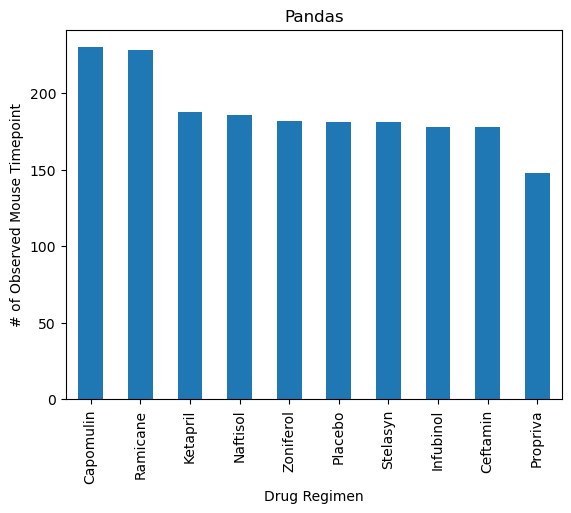

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_r = cleanMasterdf['Drug Regimen'].value_counts()
drug_r.plot(kind='bar',ylabel='# of Observed Mouse Timepoint', xlabel ='Drug Regimen', title= 'Pandas')
plt.show()


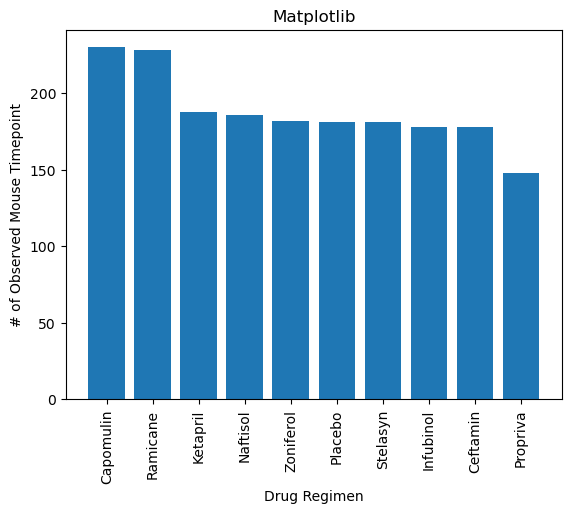

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_c = cleanMasterdf['Drug Regimen'].value_counts()
x_axis = drug_c.index
y_axis = cleanMasterdf['Drug Regimen'].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation= 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.tight_layout
plt.title('Matplotlib')
plt.show()

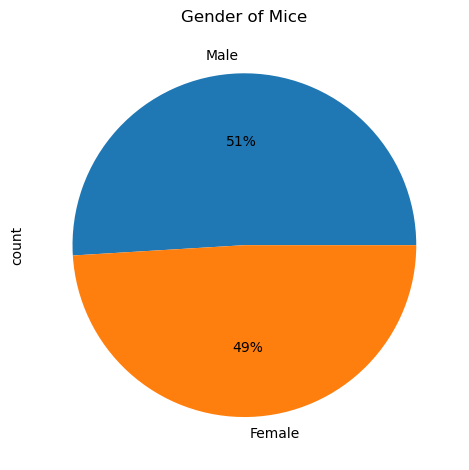

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleanMasterdf['Sex'].value_counts()
mouse_gender.plot(kind='pie', autopct = '%1.0f%%')
plt.title('Gender of Mice')
plt.tight_layout()
plt.show()

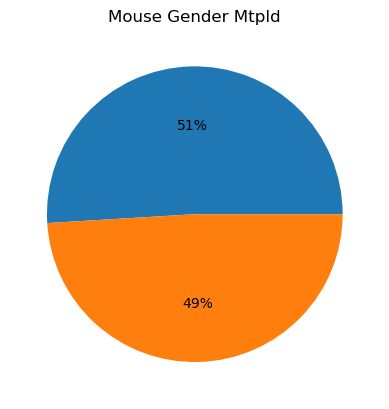

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gendermtp = cleanMasterdf['Sex'].value_counts()
plt.title('Mouse Gender Mtpld')
plt.pie(mouse_gendermtp, autopct= '%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
filteredMasterdf = cleanMasterdf[cleanMasterdf['Drug Regimen'].isin(Treatments)]
last_tp= filteredMasterdf.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaltumorvalues= pd.merge(filteredMasterdf,last_tp, on=['Mouse ID','Timepoint'], how='left')[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
finaltumorvalues

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,k403,0,45.000000,Ramicane
1,k403,5,38.825898,Ramicane
2,k403,10,35.014271,Ramicane
3,k403,15,34.223992,Ramicane
4,k403,20,32.997729,Ramicane
...,...,...,...,...
809,z581,25,54.316407,Infubinol
810,z581,30,56.286750,Infubinol
811,z581,35,58.628399,Infubinol
812,z581,40,60.053740,Infubinol


In [61]:
# Put treatments into a list  labels)
TreatmentsQ = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with potential outliers
drug_outliers = []
#Loop through treatments
for Treatment in TreatmentsQ:
    # Filter for current treatments
    tumor_volume =finaltumorvalues.loc[finaltumorvalues['Drug Regimen']== Treatment, "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

#Print Results
    print(f"{Treatment}'s outlier is")
    print(potential_outliers)
    print() #Add new line 

#Store potential outliers in the list
    drug_outliers.append({'Drug Regimen': Treatment,'Potential Outliers': potential_outliers})

print(drug_outliers)

    


Capomulin's outlier is
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's outlier is
9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's outlier is
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's outlier is
Series([], Name: Tumor Volume (mm3), dtype: float64)

[{'Drug Regimen': 'Capomulin', 'Potential Outliers': 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64}, {'Drug Regimen': 'Ramicane', 'Potential Outliers': 9    22.050126
Name: Tumor Volume (mm3), dtype: float64}, {'Drug Regimen': 'Infubinol', 'Potential Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}, {'Drug Regimen': 'Ceftamin', 'Potential Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}]


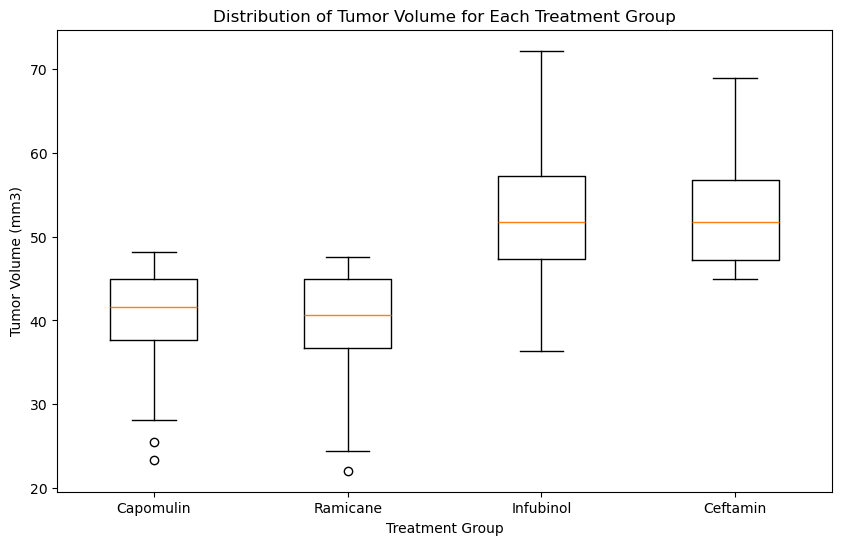

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_data = []
for treatment in TreatmentsQ:
    treatmentdf = finaltumorvalues.loc[finaltumorvalues['Drug Regimen']==treatment, 'Tumor Volume (mm3)'] 
    tumor_data.append(treatmentdf)
plt.figure(figsize=(10,6))
plt.boxplot(tumor_data, labels= TreatmentsQ)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

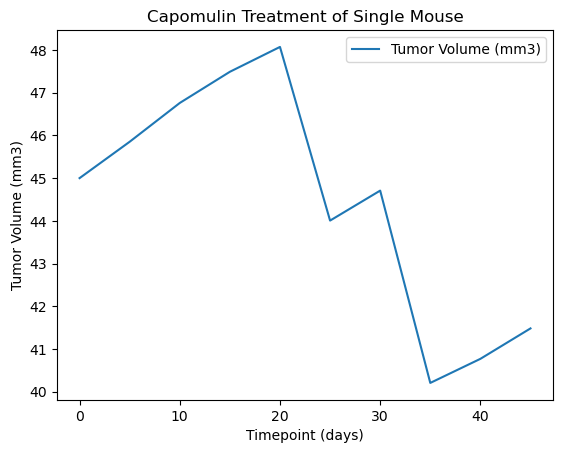

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse_id = 'l509'
capomulin =cleanMasterdf.loc[cleanMasterdf['Drug Regimen']=='Capomulin']
singlemouse_data = capomulin.loc[capomulin['Mouse ID']==singlemouse_id]
#Sort data by Timepoint
singlemouse_sorteddata = singlemouse_data.sort_values(by='Timepoint')
singlemouse_sorteddata.plot.line(y='Tumor Volume (mm3)', x='Timepoint', xlabel= 'Timepoint (days)', ylabel= 'Tumor Volume (mm3)', title= 'Capomulin Treatment of Single Mouse') 
plt.show()


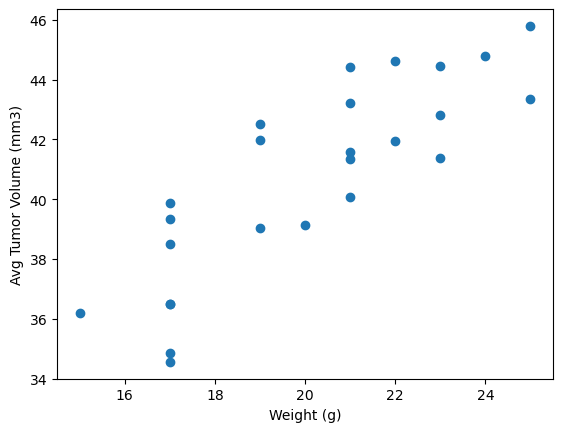

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleanMasterdf.loc[cleanMasterdf['Drug Regimen'] == 'Capomulin']
mouseavgweight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumoravgvolume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter (mouseavgweight, tumoravgvolume)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

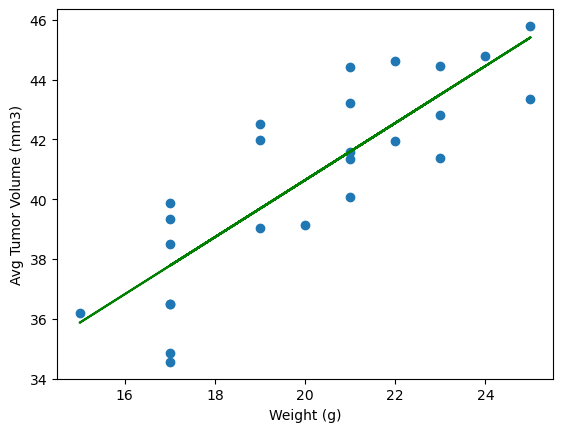

The correlation is 0.84


In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin = cleanMasterdf.loc[cleanMasterdf['Drug Regimen'] == 'Capomulin']
mouseavgweight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumoravgvolume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (mouseavgweight, tumoravgvolume)
pe_fit = pe_slope * mouseavgweight + pe_int

plt.plot(mouseavgweight,pe_fit, c= "g")
plt.scatter (mouseavgweight, tumoravgvolume)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
correlation = st.pearsonr(mouseavgweight, tumoravgvolume)
plt.show()
print(f"The correlation is {round(correlation[0],2)}")